# Applied Data Science Capstone - Week 5

## In this week, you will continue working on your capstone project. Please remember by the end of this week, you will need to submit the following:

### 1. A full report consisting of all of the following components (15 marks):<br>
Introduction where you discuss the business problem and who would be interested in this project.<br>
Data where you describe the data that will be used to solve the problem and the source of the data.<br>
Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, if any, and what machine learnings were used and why.<br>
Results section where you discuss the results.<br>
Discussion section where you discuss any observations you noted and any recommendations you can make based on the results.<br>
Conclusion section where you conclude the report.

### 2. A link to your Notebook on your Github repository pushed showing your code. (15 marks)

### 3. Your choice of a presentation or blogpost. (10 marks)

## Problem Statement

I like to build a restaurant in the Centre Business District (CBD) of Sydney. Barangaroo Ave is a vibrant place and it is a new district that is not more than 3 years of operates. Barangaroo is Australia's premier commercial hub for the Asia Pacific region, offering scale and quality on par with the world’s best office precincts and located on our world famous Sydney Harbour. It is designed to house approximately 23,000 office workers and some of Sydney’s best retailers and restaurants, Barangaroo is now open for business.

To open a restaurant is not easy, yet competitive, especially in Barangaroo. Hence, it is critical to pick the right choice of restaurant to opened in Barangaroo. I also like to open the restaurant within 10 miles radius of the center of Barangaroo because there is most of the movement of human and transport. 

## Data Requirement

1. Location data 
2. Restaurant Categories
3. Restaurant Likes & Counts
4. Details of the restaurant (stats, price, menu, hour, rating...) 



Above data will help me to make the right choice of the type of restaurant to opened in Barangaroo Ave and the data from Foursquare will have enough of data for me to analyze the existing restaurant data. 

## Data Load from Foursquare

In [6]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Folium installed
Libraries imported.


In [7]:
CLIENT_ID = 'QKG0DUQYBKMK4O2A0DCMPBA5TPOLKT03BXWRM0BPMSFI4ZRB' # your Foursquare ID
CLIENT_SECRET = 'UORLQMVVCBMY35OVZWAWX4COQVDVQJRU3LOZBR4R20KMVXWF' # your Foursquare Secret
VERSION = '20200405'
LIMIT = 50
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: QKG0DUQYBKMK4O2A0DCMPBA5TPOLKT03BXWRM0BPMSFI4ZRB
CLIENT_SECRET:UORLQMVVCBMY35OVZWAWX4COQVDVQJRU3LOZBR4R20KMVXWF


### Getting Latitude and Longitude

In [8]:
address = '300, Barangaroo Ave, Sydney, NSW'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

-33.8647217 151.2015903


### Explore the restaurants in Barangaroo

In [9]:
latitude = -33.8647217
longitude = 151.2015903
radius = 500

In [10]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=QKG0DUQYBKMK4O2A0DCMPBA5TPOLKT03BXWRM0BPMSFI4ZRB&client_secret=UORLQMVVCBMY35OVZWAWX4COQVDVQJRU3LOZBR4R20KMVXWF&ll=-33.8647217,151.2015903&v=20200405&radius=500&limit=50'

In [11]:
import requests
results = requests.get(url).json()
'There are {} around Barangaroo, Sydney.'.format(len(results['response']['groups'][0]['items']))

'There are 35 around Barangaroo, Sydney.'

In [12]:
items = results['response']['groups'][0]['items']
items[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '5630349c498ee72afcee296f',
  'name': 'Bourke Street Bakery',
  'location': {'address': '4/23 Barangaroo Ave',
   'crossStreet': 'Mercantile Walk',
   'lat': -33.86457,
   'lng': 151.20148,
   'labeledLatLngs': [{'label': 'display',
     'lat': -33.86457,
     'lng': 151.20148}],
   'distance': 19,
   'postalCode': '2000',
   'cc': 'AU',
   'neighborhood': 'Barangaroo, NSW',
   'city': 'Barangaroo',
   'state': 'NSW',
   'country': 'Australia',
   'formattedAddress': ['4/23 Barangaroo Ave (Mercantile Walk)',
    'Barangaroo NSW 2000',
    'Australia']},
  'categories': [{'id': '4bf58dd8d48988d16a941735',
    'name': 'Bakery',
    'pluralName': 'Bakeries',
    'shortName': 'Bakery',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_',
     'suffix': '.png'},
    'primary': True}],
  'photos': {'count': 0

In [13]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [14]:
dataframe = json_normalize(items) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
df_Barangaroo = dataframe.loc[:, filtered_columns]

# filter the category for each row
df_Barangaroo['venue.categories'] = df_Barangaroo.apply(get_category_type, axis=1)

# clean columns
df_Barangaroo.columns = [col.split('.')[-1] for col in df_Barangaroo.columns]

df_Barangaroo.head(10)

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,neighborhood,city,state,country,formattedAddress,id
0,Bourke Street Bakery,Bakery,4/23 Barangaroo Ave,Mercantile Walk,-33.864570,151.201480,"[{'label': 'display', 'lat': -33.86457, 'lng':...",19,2000,AU,"Barangaroo, NSW",Barangaroo,NSW,Australia,"[4/23 Barangaroo Ave (Mercantile Walk), Barang...",5630349c498ee72afcee296f
1,South Coffee Roasters,Café,"Tower 1, Shipwright Walk",Barangaroo Avenue,-33.863865,151.201770,"[{'label': 'display', 'lat': -33.863865, 'lng'...",96,2000,AU,Central Business District,Barangaroo,NSW,Australia,"[Tower 1, Shipwright Walk (Barangaroo Avenue),...",582e2fa0578375517ee5dd7b
2,Bōrn by Tapavino,Tapas Restaurant,9A/23 Barangaroo Ave.,NaN,-33.865154,151.201309,"[{'label': 'display', 'lat': -33.8651538291161...",54,2000,AU,Central Business District,Barangaroo,NSW,Australia,"[9A/23 Barangaroo Ave., Barangaroo NSW 2000, A...",5827ea01042fc73e59b2fa3c
3,The Canteen,Food Court,"G/F, Tower Two International Towers, Mercantil...",NaN,-33.864536,151.201800,"[{'label': 'display', 'lat': -33.864536, 'lng'...",28,2000,AU,NaN,Barangaroo,NSW,Australia,"[G/F, Tower Two International Towers, Mercanti...",5609bf72498ee464e67fa3d0
4,Shortstop Coffee & Donuts,Donut Shop,"Shop 3, 23 Barangaroo Ave",NaN,-33.864315,151.201420,"[{'label': 'display', 'lat': -33.864315, 'lng'...",47,2000,AU,"Barangaroo, NSW",Sydney,NSW,Australia,"[Shop 3, 23 Barangaroo Ave, Sydney NSW 2000, A...",56fd1f62498eaeee44e98ee7
5,TITLE Music Film Books,Bookstore,Exchange Place,Shelley Street,-33.865369,151.202449,"[{'label': 'display', 'lat': -33.865369, 'lng'...",107,2000,AU,NaN,Barangaroo,NSW,Australia,"[Exchange Place (Shelley Street), Barangaroo N...",5a2f1a20a92d984b6200e757
6,Nook Urban Fresh Bar,Café,83 Clarence St,NaN,-33.865767,151.204862,"[{'label': 'display', 'lat': -33.8657667166155...",324,2000,AU,NaN,Sydney,NSW,Australia,"[83 Clarence St, Sydney NSW 2000, Australia]",4c466f1bc047be9a6dce2d79
7,CAVA,Coffee Shop,168 Kent St.,NaN,-33.862581,151.204053,"[{'label': 'display', 'lat': -33.8625807867942...",329,2000,AU,NaN,Sydney,NSW,Australia,"[168 Kent St., Sydney NSW 2000, Australia]",4b4d2443f964a52076cc26e3
8,"West Hotel Sydney, Curio Collection by Hilton",Hotel,65 Sussex Street,NaN,-33.867562,151.203394,"[{'label': 'display', 'lat': -33.8675616690084...",357,2000,AU,NaN,Sydney,NSW,Australia,"[65 Sussex Street, Sydney NSW 2000, Australia]",5a35e1a460d11b58b2dc4f26
9,Made In Italy,Italian Restaurant,37 York Ln.,Erskine St.,-33.866514,151.205396,"[{'label': 'display', 'lat': -33.8665136342462...",404,2000,AU,NaN,Sydney,NSW,Australia,"[37 York Ln. (Erskine St.), Sydney NSW 2000, A...",4b58ff20f964a520867728e3


In [15]:
df_Barangaroo.to_csv('Broo_Restaurants.csv')

## Getting more info on each restaurants
### The following info is collected and added to df_Barangaro.csv for futher analysis

In [16]:
venue_id = '4b058767f964a520af9022e3' # ID of Conca Cucina Italian Restaurant
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

7.9


In [17]:
venue_id = '5630349c498ee72afcee296f' # ID of venue
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

rating = requests.get(url).json()
try:
    print(rating['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

9.1


In [18]:
venue_id = '4bdf577c0ee3a593b5e133b0' # ID of venue
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

rating = requests.get(url).json()
try:
    print(rating['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')
    
price = requests.get(url).json()
try:
    print(price['response']['venue']['price'])
except:
    print('This venue has not been rated yet.') 

likes = requests.get(url).json()
try:
    print(likes['response']['venue']['likes'])
except:
    print('This venue has no Menu.') 


This venue has not been rated yet.
{'tier': 1, 'message': 'Cheap', 'currency': '$'}
{'count': 1, 'groups': [{'type': 'others', 'count': 1, 'items': [{'id': '309773', 'firstName': 'Dave', 'lastName': 'H', 'photo': {'prefix': 'https://fastly.4sqi.net/img/user/', 'suffix': '/309773-A3LCZLKSQBSD0PPI.jpg'}}]}], 'summary': '1 Like'}


'verified', 'stats', 'url', 'price', 'hasMenu', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'delivery', 'menu', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'hours', 'popular', 'seasonalHours', 'defaultHours', 'pageUpdates', 'inbox', 'attributes', 'bestPhoto', 'colors']

# Methodology Section

In [19]:
# Libraries
import pandas as pd
import numpy as np
import math
import pandas_profiling
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from dython.nominal import associations
from dython.nominal import cluster_correlations
from dython.nominal import conditional_entropy
from dython.nominal import correlation_ratio
from dython.nominal import cramers_v
from dython.nominal import identify_nominal_columns
from dython.nominal import numerical_encoding
from dython.nominal import theils_u
from dython.model_utils import roc_graph
from dython.model_utils import random_forest_feature_importance
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Original Dataset

In [52]:
df = pd.read_csv('Capstone.csv', encoding='ISO-8859-1')

In [53]:
df.head()

,categories,distance,Rating,Price,Likes,Cuisine
0,Bakery,19,9.2,Cheap,55,Bakery/Dessert/Coffee
1,Café,96,8.8,Cheap,21,Bakery/Dessert/Coffee
2,Tapas Restaurant,54,8.6,Expensive,30,Southern Cuisine
3,Bar,103,8.3,Moderate,18,Leisure / Alcohol
4,Bar,103,8.3,Moderate,17,Leisure / Alcohol


# Label Encoder Dataset

## Data Feature Information

In [35]:
df_le = df

In [36]:
df_le.head()

,categories,distance,Rating,Price,Likes,Cuisine
0,Bakery,19,9.2,Cheap,55,Bakery/Dessert/Coffee
1,Café,96,8.8,Cheap,21,Bakery/Dessert/Coffee
2,Tapas Restaurant,54,8.6,Expensive,30,Southern Cuisine
3,Bar,103,8.3,Moderate,18,Leisure / Alcohol
4,Bar,103,8.3,Moderate,17,Leisure / Alcohol


In [37]:
df_le = pd.DataFrame({col: df[col].astype('category').cat.codes for col in df}, index=df.index)

In [38]:
df_le.head()

,categories,distance,Rating,Price,Likes,Cuisine
0,0,0,26,0,26,1
1,5,5,25,0,14,1
2,24,3,23,1,17,5
3,1,6,20,2,13,3
4,1,6,20,2,12,3


In [39]:
df2=df

In [40]:
df2.head()

,categories,distance,Rating,Price,Likes,Cuisine
0,Bakery,19,9.2,Cheap,55,Bakery/Dessert/Coffee
1,Café,96,8.8,Cheap,21,Bakery/Dessert/Coffee
2,Tapas Restaurant,54,8.6,Expensive,30,Southern Cuisine
3,Bar,103,8.3,Moderate,18,Leisure / Alcohol
4,Bar,103,8.3,Moderate,17,Leisure / Alcohol


In [41]:
df2['categories'] = df_le['categories']

In [42]:
df2['Price'] = df_le['Price']

In [43]:
df2['Cuisine'] = df_le['Cuisine']

In [44]:
{col: {n: cat for n, cat in enumerate(df2[col].astype('category').cat.categories)} 
     for col in df}

{'categories': {0: 0,
  1: 1,
  2: 2,
  3: 3,
  4: 4,
  5: 5,
  6: 6,
  7: 7,
  8: 8,
  9: 9,
  10: 10,
  11: 11,
  12: 12,
  13: 13,
  14: 14,
  15: 15,
  16: 16,
  17: 17,
  18: 18,
  19: 19,
  20: 20,
  21: 21,
  22: 22,
  23: 23,
  24: 24},
 'distance': {0: 19,
  1: 28,
  2: 47,
  3: 54,
  4: 68,
  5: 96,
  6: 103,
  7: 106,
  8: 217,
  9: 236,
  10: 266,
  11: 282,
  12: 309,
  13: 321,
  14: 324,
  15: 331,
  16: 335,
  17: 336,
  18: 340,
  19: 357,
  20: 376,
  21: 383,
  22: 386,
  23: 394,
  24: 400,
  25: 403,
  26: 404,
  27: 414,
  28: 440,
  29: 443,
  30: 446,
  31: 451,
  32: 454,
  33: 455,
  34: 464,
  35: 470,
  36: 475,
  37: 484,
  38: 490,
  39: 494,
  40: 496,
  41: 498,
  42: 499},
 'Rating': {0: 0.0,
  1: 5.8,
  2: 5.9,
  3: 6.1,
  4: 6.2,
  5: 6.3,
  6: 6.4,
  7: 6.6,
  8: 6.8,
  9: 6.9,
  10: 7.1,
  11: 7.2,
  12: 7.3,
  13: 7.4,
  14: 7.5,
  15: 7.7,
  16: 7.8,
  17: 7.9,
  18: 8.1,
  19: 8.2,
  20: 8.3,
  21: 8.4,
  22: 8.5,
  23: 8.6,
  24: 8.7,
  25: 8.8,

In [45]:
df2.head()

,categories,distance,Rating,Price,Likes,Cuisine
0,0,19,9.2,0,55,1
1,5,96,8.8,0,21,1
2,24,54,8.6,1,30,5
3,1,103,8.3,2,18,3
4,1,103,8.3,2,17,3


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 6 columns):
categories    46 non-null int8
distance      46 non-null int64
Rating        46 non-null float64
Price         46 non-null int8
Likes         46 non-null int64
Cuisine       46 non-null int8
dtypes: float64(1), int64(2), int8(3)
memory usage: 1.3 KB


In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 6 columns):
categories    46 non-null int8
distance      46 non-null int64
Rating        46 non-null float64
Price         46 non-null int8
Likes         46 non-null int64
Cuisine       46 non-null int8
dtypes: float64(1), int64(2), int8(3)
memory usage: 1.3 KB


In [38]:
df.describe()

,categories,distance,Rating,Price,Likes,Cuisine
count,46.000000,46.00000,46.000000,46.000000,46.000000,46.000000
mean,9.978261,335.73913,6.986957,0.739130,34.804348,2.565217
std,6.996790,151.21573,2.079061,1.357036,38.043612,1.424425
min,0.000000,19.00000,0.000000,-1.000000,1.000000,0.000000
25%,5.000000,270.00000,6.400000,0.000000,12.000000,1.000000
50%,9.500000,384.50000,7.400000,0.500000,19.500000,3.000000
75%,14.750000,453.25000,8.200000,2.000000,43.500000,3.000000
max,24.000000,499.00000,9.200000,3.000000,177.000000,6.000000


## Data Features Analysis

In [75]:
profile = ProfileReport(df)

build report structure: 100%|██████████| 1/1 [00:07<00:00,  7.57s/it]


In [76]:
profile

In [41]:
profile2 = ProfileReport(df2)

build report structure: 100%|██████████| 1/1 [00:06<00:00,  6.06s/it]


In [42]:
profile2

## Correlation

Calculate the correlation/strength-of-association of features in data-set with both categorical (eda_tools) and continuous features using:
Pearson’s R for continuous-continuous cases
Correlation Ratio for categorical-continuous cases
Cramer’s V or Theil’s U for categorical-categorical cases

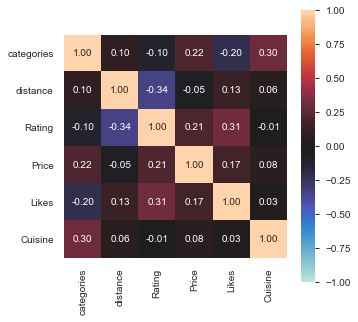

In [43]:
associations(df,figsize=(5,5))

## Theils_u
Calculates Theil’s U statistic (Uncertainty coefficient) for the categorical-categorical association. This is the uncertainty of x given y: value is on the range of 0,1 - where 0 means y provides no information about x, and 1 means y provides full information about x. This is an asymmetric coefficient: U(x,y) != U(y,x

In [44]:
x = ['distance', 'Rating', 'Price', 'Likes','Cuisine']

y = ['categories']

theils_u(x, y)

1.0

## Seaborn Joinplot - 2D Density

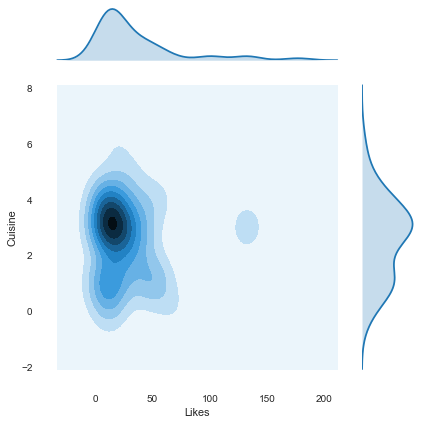

In [45]:
sns.jointplot(x="Likes", y="Cuisine", data=df2, kind="kde")

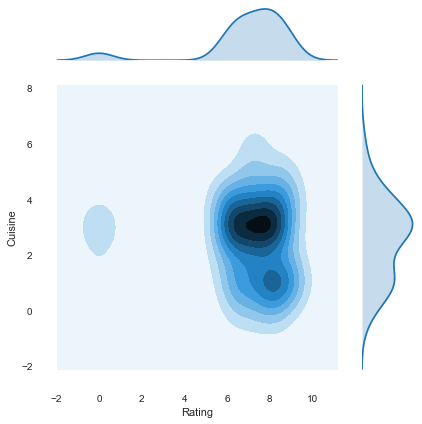

In [46]:
sns.jointplot(x="Rating", y="Cuisine", data=df2, kind="kde")

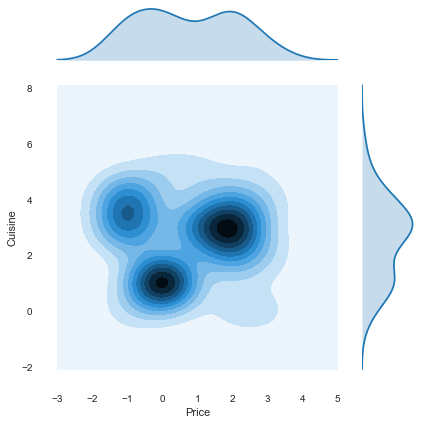

In [47]:
sns.jointplot(x="Price", y="Cuisine", data=df2, kind="kde")

In [48]:
# N-across Histograms of each variable in the dataframe ...
# Required parameter: dataframe ... the reference pandas dataframe

# Optional parameters: cols ... no. of subplot columns across fig; default=1
#                      file  ... (string) path+filename if you want to save image

def gen_histograms(dataframe, cols=1, file=None):
    rows      = math.ceil(len(dataframe.columns)/cols)
    figwidth  = 5 * cols
    figheight = 4 * rows

    fig, ax = plt.subplots(nrows   = rows,
                           ncols   = cols,
                           figsize = (figwidth, figheight))
    
    color_choices = ['blue', 'grey', 'goldenrod', 'r', 'black', 'darkorange', 'g']
    ax = ax.ravel()         # Ravel turns a matrix into a vector... easier to iterate

    for i, column in enumerate(dataframe.columns):
        ax[i].hist(dataframe[column],
                      color=color_choices[i % len(color_choices)],
                      alpha = 1)
        
        ax[i].set_title(dataframe[column].name, fontsize=18)
        ax[i].set_ylabel('Observations', fontsize=14)
        ax[i].set_xlabel(dataframe[column].name, fontsize=14)
        
    fig.suptitle('\nHistograms for All Variables in Dataframe', size=24)
    fig.tight_layout()
    fig.subplots_adjust(bottom=0, top=0.88)
    if file: plt.savefig(file, bbox_inches='tight')
    plt.show();

    return

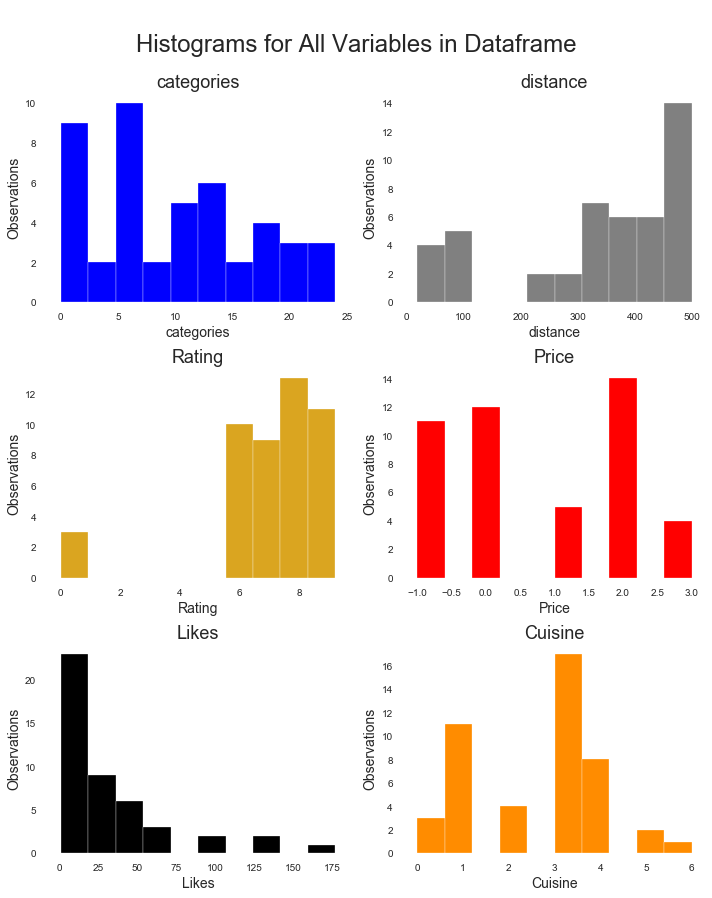

In [49]:
gen_histograms(df2, cols=2, file=None)

In [50]:
# N-across boxplots of each variable in the dataframe ...
# Required parameter: dataframe ... the reference pandas dataframe

# Optional parameters: cols ... no. of subplot columns across fig; default=1
#                      file  ... (string) path+filename if you want to save image


def gen_boxplots(dataframe, cols=1, file=None):
    rows      = math.ceil(len(dataframe.columns)/cols)
    figwidth  = 5 * cols
    figheight = 4 * rows

    fig, ax = plt.subplots(nrows   = rows,
                           ncols   = cols,
                           figsize = (figwidth, figheight))
    
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    ax = ax.ravel()         # Ravel turns a matrix into a vector... easier to iterate

    for i, column in enumerate(dataframe.columns):
        ax[i].boxplot(dataframe[column])
        
        ax[i].set_title(dataframe[column].name, fontsize=18)
        ax[i].set_ylabel(column, fontsize=14)
        ax[i].set_xlabel(column, fontsize=14)
        ax[i].tick_params(labelbottom=False)
        
    fig.suptitle('\nBoxplots for All Variables in Dataframe', size=24)
    fig.tight_layout()
    fig.subplots_adjust(bottom=0, top=0.88)
    if file: plt.savefig(file, bbox_inches='tight')
    plt.show();

    return

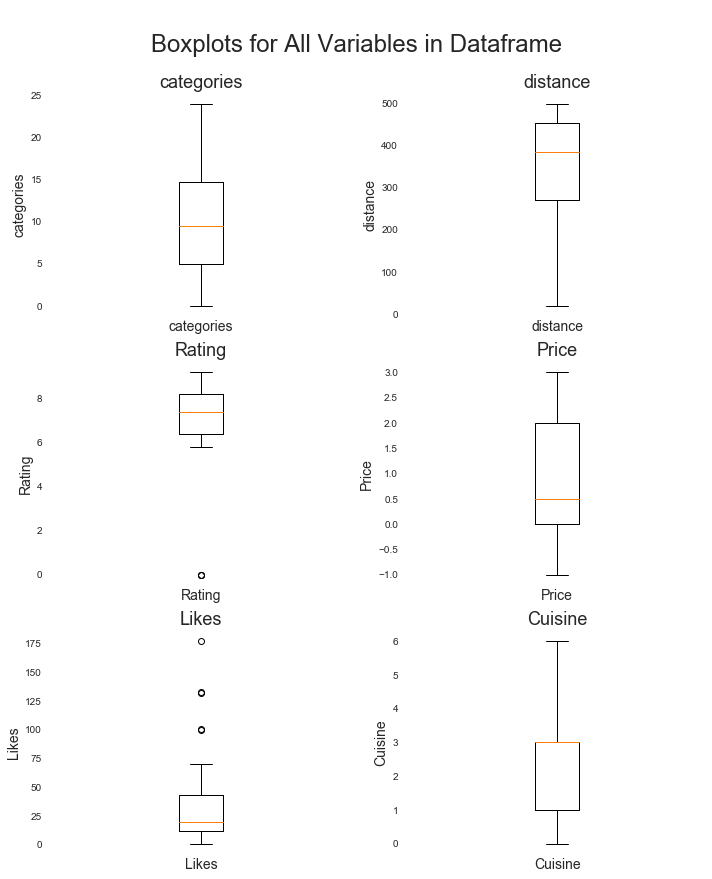

In [51]:
gen_boxplots(df2,2)

# Model Selection

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.linear_model import RidgeClassifier
#model metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [46]:
x=df2.drop("Cuisine",1)
y=df2["Cuisine"]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [48]:
%%time

models = [RandomForestClassifier(), 
            LogisticRegression(), 
            SGDClassifier(loss='modified_huber', shuffle=True, random_state=100),
		    KNeighborsClassifier(n_neighbors=7), 
            DecisionTreeClassifier(), 
            GaussianNB(),
            svm.SVC(decision_function_shape='ovo'), 
            RidgeClassifier(), 
		    ExtraTreesClassifier(), 
            AdaBoostClassifier(), 
            GradientBoostingClassifier(), 
            MLPClassifier(hidden_layer_sizes=1, activation='relu',batch_size='auto',learning_rate='adaptive',solver='lbfgs', alpha=1e-5)]


model_names = ['RandomForest',
                'LogisticRegression', 
                 'StochasticGradientDescent', 
                 'KNN',
                'DecisionTree',
                 'NaiveBayes Gaussian',
		        'SupportVectorMachine',
                 'RidgeClassification',
                  'ExtraTree',
                   'AdaBoost',
                    'GradientTreeBoost',
                     'ANN']

acc=[]
precision=[]
recall=[]
fscore=[]
d={}
for model in range(len(models)):
    clf=models[model]
    clf.fit(X_train,y_train)
    sumpred=clf.predict(X_test)
    acc.append(accuracy_score(sumpred,y_test)*100)
    precision.append(precision_score(sumpred,y_test,average='weighted')*100)
    recall.append(recall_score(sumpred,y_test,average='weighted')*100)
    fscore.append(f1_score(sumpred,y_test,average='weighted')*100)
     
d={'Precision':precision,'Recall':recall, 'F1 Score':fscore,'Accuracy':acc,'Modelling Algorithms':model_names}

Wall time: 1.78 s


In [49]:
acc_frame=pd.DataFrame(d)
acc_frame

,Precision,Recall,F1 Score,Accuracy,Modelling Algorithms
0,60.0,60.0,53.333333,60.0,RandomForest
1,30.0,20.0,24.000000,20.0,LogisticRegression
2,80.0,40.0,53.333333,40.0,StochasticGradientDescent
3,30.0,20.0,24.000000,20.0,KNN
4,90.0,80.0,81.333333,80.0,DecisionTree
5,50.0,40.0,44.000000,40.0,NaiveBayes Gaussian
6,80.0,40.0,53.333333,40.0,SupportVectorMachine
7,40.0,40.0,40.000000,40.0,RidgeClassification
8,90.0,80.0,80.000000,80.0,ExtraTree
9,40.0,40.0,40.000000,40.0,AdaBoost


From the performance of the model selection, I've decided to use Random Forest Classifier to decide the cuisine of restuarant that I want to open. 

# Random Forest Model

In [50]:
#Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
#Validation
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from yellowbrick.target import ClassBalance
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import DiscriminationThreshold
from yellowbrick.classifier import ConfusionMatrix

In [54]:
df.head()

,categories,distance,Rating,Price,Likes,Cuisine
0,Bakery,19,9.2,Cheap,55,Bakery/Dessert/Coffee
1,Café,96,8.8,Cheap,21,Bakery/Dessert/Coffee
2,Tapas Restaurant,54,8.6,Expensive,30,Southern Cuisine
3,Bar,103,8.3,Moderate,18,Leisure / Alcohol
4,Bar,103,8.3,Moderate,17,Leisure / Alcohol


In [55]:
x2=df.drop("Cuisine",1)
y2=df["Cuisine"]

In [56]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.1)

In [57]:
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder='passthrough')

In [58]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

numeric_features = df2.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).drop("Cuisine",1).columns

preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_features),
                ('cat', categorical_transformer, categorical_features)])

In [59]:
%%time

dt = Pipeline(steps=[('preprocessor', preprocessor),
                      ('rf', DecisionTreeClassifier())])

dt.fit(X_train2, y_train2)

Wall time: 39.9 ms


Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [61]:
rf_y_pred = dt.predict(X_test2)
print(classification_report(y_test2, rf_y_pred,digits=5))

precision    recall  f1-score   support

Bakery/Dessert/Coffee    1.00000   1.00000   1.00000         2
             European    1.00000   1.00000   1.00000         1
    Leisure / Alcohol    1.00000   1.00000   1.00000         2

             accuracy                        1.00000         5
            macro avg    1.00000   1.00000   1.00000         5
         weighted avg    1.00000   1.00000   1.00000         5



In [62]:
df.head()

,categories,distance,Rating,Price,Likes,Cuisine
0,Bakery,19,9.2,Cheap,55,Bakery/Dessert/Coffee
1,Café,96,8.8,Cheap,21,Bakery/Dessert/Coffee
2,Tapas Restaurant,54,8.6,Expensive,30,Southern Cuisine
3,Bar,103,8.3,Moderate,18,Leisure / Alcohol
4,Bar,103,8.3,Moderate,17,Leisure / Alcohol


# Results

From the data analysis above, to attract a good business in Barangaroo area, I like to know what type of cuisine the population in Barangaroo would like with a decent rating of 7,8,9 and likes around 60,70,80. 

I'm going to run a different scenario to predict the cuisine of the restaurant I should open. 

In [91]:
data = {'categories':['Restaurant', 'Restaurant', 'Restaurant', 'Restaurant','Restaurant','Restaurant','Restaurant','Restaurant','Restaurant','Restaurant','Restaurant','Restaurant'],
        'distance':[20, 20, 20, 20, 50, 50, 50, 50, 100, 100, 100, 100],
        'Rating':[6,7,8,9,6,7,8,9,6,7,8,9],
        'Price':['Cheap','Moderate','Expensive','Very Expensive','Cheap','Moderate','Expensive','Very Expensive','Cheap','Moderate','Expensive','Very Expensive'],
        'Likes':[70,80,90,100,70,80,90,100,70,80,90,100]}

sample = pd.DataFrame(data)

In [92]:
sample.head()

,categories,distance,Rating,Price,Likes
0,Restaurant,20,6,Cheap,70
1,Restaurant,20,7,Moderate,80
2,Restaurant,20,8,Expensive,90
3,Restaurant,20,9,Very Expensive,100
4,Restaurant,50,6,Cheap,70


In [93]:
pred_result = dt.predict(sample)

In [94]:
sample['Prediction_Cuisine'] = pred_result

In [95]:
sample.head(50)

,categories,distance,Rating,Price,Likes,Prediction_Cuisine
0,Restaurant,20,6,Cheap,70,Bakery/Dessert/Coffee
1,Restaurant,20,7,Moderate,80,Multi Cuisine
2,Restaurant,20,8,Expensive,90,Multi Cuisine
3,Restaurant,20,9,Very Expensive,100,Multi Cuisine
4,Restaurant,50,6,Cheap,70,Bakery/Dessert/Coffee
5,Restaurant,50,7,Moderate,80,Multi Cuisine
6,Restaurant,50,8,Expensive,90,Multi Cuisine
7,Restaurant,50,9,Very Expensive,100,Multi Cuisine
8,Restaurant,100,6,Cheap,70,Bakery/Dessert/Coffee
9,Restaurant,100,7,Moderate,80,Multi Cuisine


# Conclusion

The prediction result has returned Multi Cuisines as the majority results and Bakery/Dessert/Coffee as one of the prediction when the price is Cheap. 

In conclusion, multi cuisine would be the sell out restaurant to open in Barangaroo. I am satisfied with the result as Barangaroo is a melting pot of Sydney, where a place full with diversity and it make sense to open a "Multi Cuisine", that could mean a fusion restaurant or change my menu regularly to offer different cuisines. 
